In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 150
import numpy as np
import math
from pprint import pprint
sns.set()

In [3]:
parasweep = pd.read_csv("fox_rabbit3D_multipara.csv")

In [4]:
parasweep.shape

(432000, 8)

In [5]:
parasweep

,runtime,The number of rabbits,The number of foxes,r_birth,f_birth,f_death,number_of_trajectories,Timespan
0,0.544513,1.157000e+03,1152.000000,5.0,0.005,5.000000,1,20
1,0.391062,1.139000e+03,563.000000,5.0,0.005,6.666667,1,20
2,0.371088,3.011000e+03,253.000000,5.0,0.005,8.333333,1,20
3,0.198700,5.800000e+02,80.000000,5.0,0.005,10.000000,1,20
4,0.437672,7.570000e+02,717.000000,5.0,0.005,11.666667,1,20
...,...,...,...,...,...,...,...,...
431995,2.411189,1.102857e+03,893.142857,100.0,0.100,84.210526,7,40
431996,2.469272,3.614286e+02,1532.571429,100.0,0.100,88.157895,7,40
431997,2.330160,6.644286e+02,805.428571,100.0,0.100,92.105263,7,40
431998,20.024446,1.067954e+07,53.285714,100.0,0.100,96.052632,7,40


In [6]:
parasweep["number_of_trajectories"].min()

1

In [7]:
parasweep["Timespan"].min()

10

In [8]:
paramin = parasweep[parasweep["Timespan"] == 10]
paramin = paramin[paramin["number_of_trajectories"] == 1]
paramin

,runtime,The number of rabbits,The number of foxes,r_birth,f_birth,f_death,number_of_trajectories,Timespan
108000,0.158088,2247.0,897.0,5.0,0.005,5.000000,1,10
108001,0.188695,1841.0,1514.0,5.0,0.005,6.666667,1,10
108002,0.199634,462.0,669.0,5.0,0.005,8.333333,1,10
108003,0.119647,852.0,887.0,5.0,0.005,10.000000,1,10
108004,0.176647,345.0,350.0,5.0,0.005,11.666667,1,10
...,...,...,...,...,...,...,...,...
134995,0.103933,1259.0,1096.0,100.0,0.100,84.210526,1,10
134996,0.112256,501.0,801.0,100.0,0.100,88.157895,1,10
134997,0.109886,1236.0,1053.0,100.0,0.100,92.105263,1,10
134998,0.108448,1199.0,1143.0,100.0,0.100,96.052632,1,10


In [9]:
paramin_groups = paramin.groupby(['r_birth','f_birth','f_death'])
paramin_groups.agg({"runtime":"count"}).rename(columns={"runtime":"number of groups"})

number of groups
r_birth f_birth f_death                     
5.0     0.005   5.000000                   2
                5.789474                   1
                6.578947                   1
                6.666667                   1
                7.368421                   1
...                                      ...
100.0   0.100   88.157895                  1
                91.666667                  1
                92.105263                  1
                96.052632                  1
                100.000000                 2

[26960 rows x 1 columns]

In [10]:
para_index = np.arange(len(paramin_groups))
para_index

array([    0,     1,     2, ..., 26957, 26958, 26959])

In [11]:
para_ml = pd.DataFrame(columns = ['r_birth','f_birth','f_death','runtime_normalized'], index = para_index)
para_ml

,r_birth,f_birth,f_death,runtime_normalized
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
26955,NaN,NaN,NaN,NaN
26956,NaN,NaN,NaN,NaN
26957,NaN,NaN,NaN,NaN
26958,NaN,NaN,NaN,NaN


In [12]:
# Normalization of runtime
i = 0
for k,v in paramin_groups:
    para_ml.loc[i, "r_birth"] = k[0]
    para_ml.loc[i, "f_birth"] = k[1]
    para_ml.loc[i, "f_death"] = k[2]
    group = paramin_groups.get_group(k)
    group = group.copy()
    
    if (group["runtime"] > 17.5).any():
        para_ml.loc[i, "runtime_normalized"] = np.inf
    else:
        group['runtime_normalized'] = group["runtime"]/(group['Timespan'] * group['number_of_trajectories'])
        para_ml.loc[i, "runtime_normalized"] = group["runtime_normalized"].mean()
        
    i = i+1

In [13]:
para_ml

,r_birth,f_birth,f_death,runtime_normalized
0,5.0,0.005,5.0,0.016803
1,5.0,0.005,5.789474,0.022095
2,5.0,0.005,6.578947,0.015868
3,5.0,0.005,6.666667,0.01887
4,5.0,0.005,7.368421,0.01662
...,...,...,...,...
26955,100.0,0.1,88.157895,0.011226
26956,100.0,0.1,91.666667,0.015999
26957,100.0,0.1,92.105263,0.010989
26958,100.0,0.1,96.052632,0.010845


In [14]:
para_ml[para_ml["runtime_normalized"] == np.inf]

,r_birth,f_birth,f_death,runtime_normalized


In [15]:
# Normalization of model parameters
para_ml["r_birth_normalized"] = (para_ml["r_birth"]-para_ml["r_birth"].min())/(para_ml["r_birth"].max()-para_ml["r_birth"].min())
para_ml["f_birth_normalized"] = (para_ml["f_birth"]-para_ml["f_birth"].min())/(para_ml["f_birth"].max()-para_ml["f_birth"].min())
para_ml["f_death_normalized"] = (para_ml["f_death"]-para_ml["f_death"].min())/(para_ml["f_death"].max()-para_ml["f_death"].min())

In [16]:
para_ml

,r_birth,f_birth,f_death,runtime_normalized,r_birth_normalized,f_birth_normalized,f_death_normalized
0,5.0,0.005,5.0,0.016803,0.0,0.0,0.0
1,5.0,0.005,5.789474,0.022095,0.0,0.0,0.00831
2,5.0,0.005,6.578947,0.015868,0.0,0.0,0.01662
3,5.0,0.005,6.666667,0.01887,0.0,0.0,0.017544
4,5.0,0.005,7.368421,0.01662,0.0,0.0,0.024931
...,...,...,...,...,...,...,...
26955,100.0,0.1,88.157895,0.011226,1.0,1.0,0.875346
26956,100.0,0.1,91.666667,0.015999,1.0,1.0,0.912281
26957,100.0,0.1,92.105263,0.010989,1.0,1.0,0.916898
26958,100.0,0.1,96.052632,0.010845,1.0,1.0,0.958449


In [17]:
# Features for machine learning
X = pd.DataFrame(para_ml,columns = ["r_birth_normalized", "f_birth_normalized","f_death_normalized"])
Y = para_ml["runtime_normalized"]

In [18]:
from river import stream
from river import evaluate
from river import metrics
from river import neighbors
from river import preprocessing

Text(0.5, 1.0, 'MAE: 0.021642, RMSE: 0.029881')

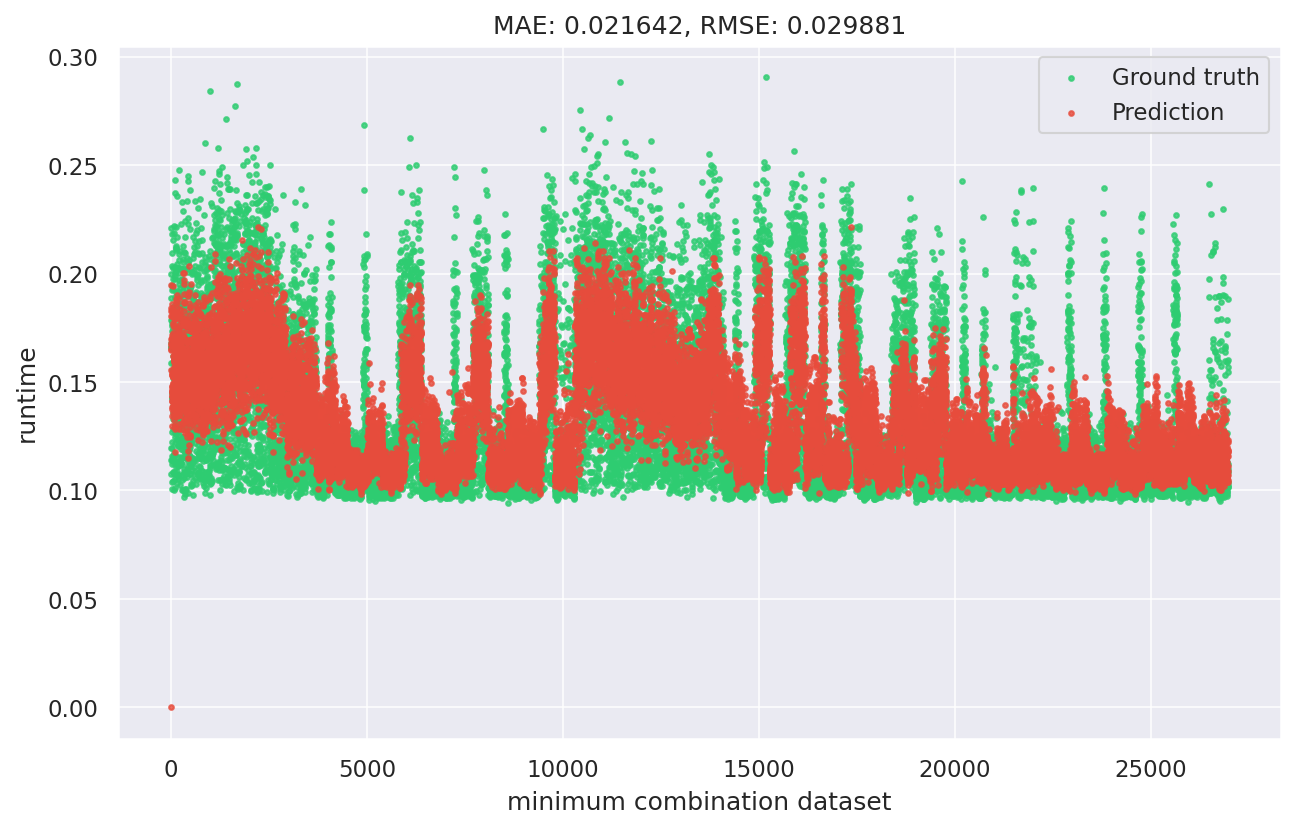

In [37]:
y_trues = []
y_preds = []
mae = []
rmse = []
model = neighbors.KNNRegressor()
metric1 = metrics.MAE()
metric2 = metrics.RMSE()
for x, y in stream.iter_pandas(X, Y):

    # Obtain the prior prediction and update the model in one go
    y_pred = model.predict_one(x)
    model.learn_one(x,y)
    
    if y == np.inf:
        y = 20
    else:
        y = y * 10 * 1
        
    y_pred = y_pred * 10 * 1
    if y_pred > 20:
        y_pred = 20

    # Update the error metric
    metric1.update(y,y_pred)
    mae.append(metric1.get())
    metric2.update(y,y_pred)
    rmse.append(metric2.get())

    y_trues.append(y)
    y_preds.append(y_pred)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(alpha=0.75)
ax.scatter(Y.index, y_trues, lw=1, color='#2ecc71', alpha=0.8, s=5, label='Ground truth')
ax.scatter(Y.index, y_preds, lw=1, color='#e74c3c', alpha=0.8,s=5, label='Prediction')
ax.legend()
ax.set_ylabel('runtime')
ax.set_xlabel('minimum combination dataset')
ax.set_title(f'{metric1}, {metric2}')

Text(0.5, 1.0, 'Real-time Performance')

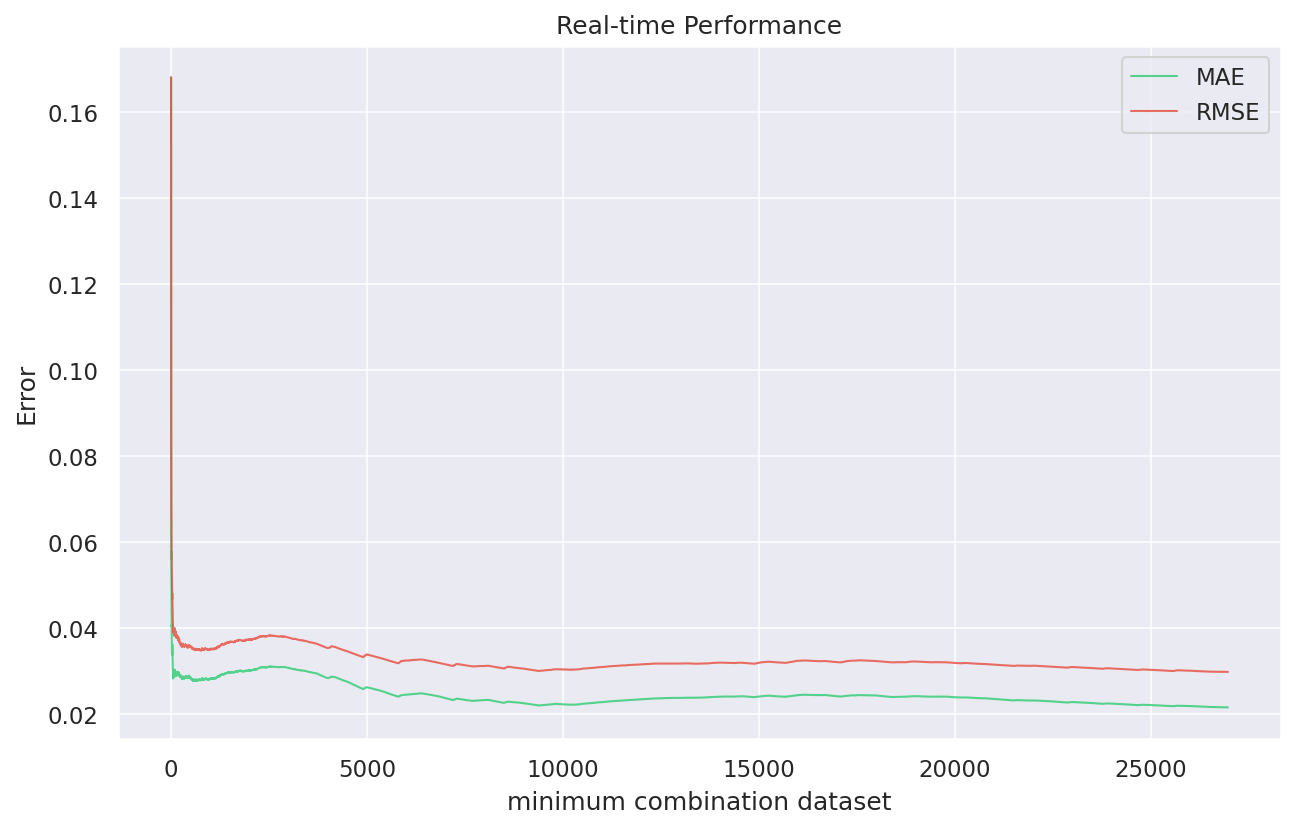

In [27]:
# Real-time performance of the K-NN model
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(alpha=0.75)
ax.plot(mae, lw=1, color='#2ecc71', alpha=0.8, label='MAE')
ax.plot(rmse,lw=1, color='#e74c3c', alpha=0.8, label='RMSE')
ax.legend()
ax.set_ylabel('Error')
ax.set_xlabel('minimum combination dataset')
ax.set_title(f'Real-time Performance')

Text(0.5, 0, 'runtime')

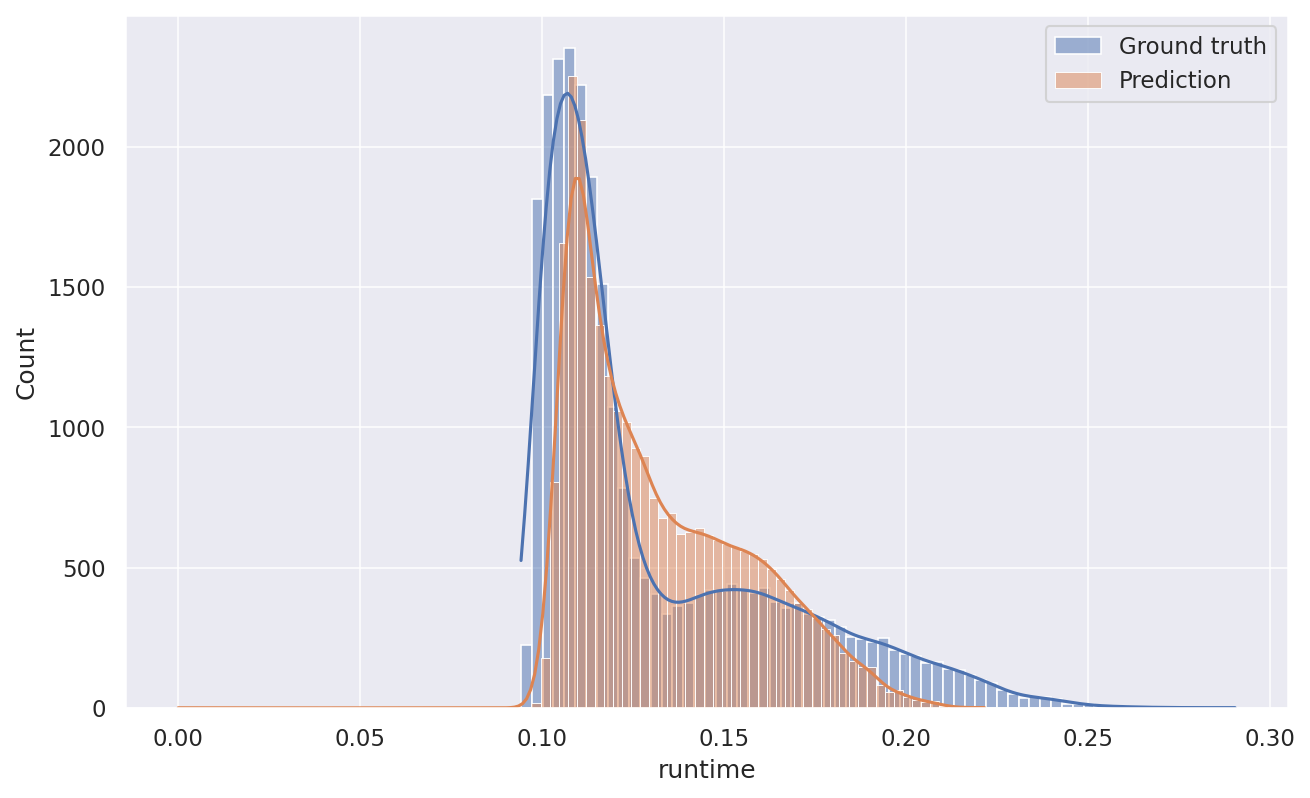

In [28]:
# The distributions of the predicted and actual running times
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(alpha=0.75)
sns.histplot(x=y_trues,kde=True,label='Ground truth')
sns.histplot(x=y_preds,kde=True,label='Prediction')
ax.legend()
ax.set_xlabel('runtime')

In [22]:
# Tune the hyperparameters

In [29]:
metric1_lst = []
metric2_lst = []
pred = []
trues = []
for n in range(34,37,1):
    X = pd.DataFrame(para_ml,columns = ["r_birth_normalized", "f_birth_normalized","f_death_normalized"])
    Y = para_ml["runtime_normalized"]

    model = neighbors.KNNRegressor(n_neighbors=n)
    metric1 = metrics.MAE()
    metric2 = metrics.RMSE()
    for x, y in stream.iter_pandas(X, Y):
        # Obtain the prior prediction and update the model in one go
        y_pred = model.predict_one(x)
        model.learn_one(x,y)
        
        if y == np.inf:
            y = 20
        else:
            y = y * 10 * 1

        y_pred = y_pred * 10 * 1
        if y_pred > 20:
            y_pred = 20

        # Update the error metric
        metric1.update(y,y_pred)
        metric2.update(y,y_pred)
        pred.append(y_pred)
        trues.append(y)
        
        
    metric1_lst.append(metric1)
    metric2_lst.append(metric2)

In [30]:
metric1_lst

[MAE: 0.019569, MAE: 0.019551, MAE: 0.019557]

In [31]:
metric2_lst

[RMSE: 0.027449, RMSE: 0.027446, RMSE: 0.027438]

In [ ]:
# n_neighbors = 35

In [27]:
engines = [neighbors.SWINN(), neighbors.LazySearch()]
metric1_lst = []
metric2_lst = []
pred = []
trues = []
for eng in engines:
    X = pd.DataFrame(para_ml,columns = ["r_birth_normalized", "f_birth_normalized","f_death_normalized"])
    Y = para_ml["runtime_normalized"]

    model = neighbors.KNNRegressor(n_neighbors=35, engine = eng)
    metric1 = metrics.MAE()
    metric2 = metrics.RMSE()
    for x, y in stream.iter_pandas(X, Y):
        # Obtain the prior prediction and update the model in one go
        y_pred = model.predict_one(x)
        model.learn_one(x,y)
        
        if y == np.inf:
            y = 20
        else:
            y = y * 10 * 1

        y_pred = y_pred * 10 * 1
        if y_pred > 20:
            y_pred = 20

        # Update the error metric
        metric1.update(y,y_pred)
        metric2.update(y,y_pred)
        pred.append(y_pred)
        trues.append(y)
        
        
    metric1_lst.append(metric1)
    metric2_lst.append(metric2)

In [28]:
metric1_lst

[MAE: 0.019551, MAE: 0.017149]

In [29]:
metric2_lst

[RMSE: 0.027444, RMSE: 0.024709]

In [ ]:
# engine = neighbors.LazySearch(window_size, min_distance_keep, dist_func)

In [39]:
metric1_lst = []
metric2_lst = []
pred = []
trues = []
for win in range(13,16):
    X = pd.DataFrame(para_ml,columns = ["r_birth_normalized", "f_birth_normalized","f_death_normalized"])
    Y = para_ml["runtime_normalized"]

    model = neighbors.KNNRegressor(n_neighbors=35, engine = neighbors.LazySearch(window_size = win))
    metric1 = metrics.MAE()
    metric2 = metrics.RMSE()
    for x, y in stream.iter_pandas(X, Y):
        # Obtain the prior prediction and update the model in one go
        y_pred = model.predict_one(x)
        model.learn_one(x,y)
        
        if y == np.inf:
            y = 20
        else:
            y = y * 10 * 1

        y_pred = y_pred * 10 * 1
        if y_pred > 20:
            y_pred = 20

        # Update the error metric
        metric1.update(y,y_pred)
        metric2.update(y,y_pred)
        pred.append(y_pred)
        trues.append(y)
        
        
    metric1_lst.append(metric1)
    metric2_lst.append(metric2)

In [40]:
metric1_lst

[MAE: 0.016879, MAE: 0.016885, MAE: 0.01689]

In [41]:
metric2_lst

[RMSE: 0.024539, RMSE: 0.024528, RMSE: 0.024519]

In [ ]:
# engine = neighbors.LazySearch(window_size = 13)

In [45]:
import functools
from river.utils.math import minkowski_distance

metric1_lst = []
metric2_lst = []
pred = []
trues = []
for p in range(1,3):
    X = pd.DataFrame(para_ml,columns = ["r_birth_normalized", "f_birth_normalized","f_death_normalized"])
    Y = para_ml["runtime_normalized"]

    model = neighbors.KNNRegressor(n_neighbors=35, engine = neighbors.LazySearch(window_size = 13, dist_func = functools.partial(minkowski_distance, p=p)))
    metric1 = metrics.MAE()
    metric2 = metrics.RMSE()
    for x, y in stream.iter_pandas(X, Y):
        # Obtain the prior prediction and update the model in one go
        y_pred = model.predict_one(x)
        model.learn_one(x,y)
        
        if y == np.inf:
            y = 20
        else:
            y = y * 10 * 1

        y_pred = y_pred * 10 * 1
        if y_pred > 20:
            y_pred = 20

        # Update the error metric
        metric1.update(y,y_pred)
        metric2.update(y,y_pred)
        pred.append(y_pred)
        trues.append(y)
        
        
    metric1_lst.append(metric1)
    metric2_lst.append(metric2)

In [46]:
metric1_lst

[MAE: 0.016879, MAE: 0.016879]

In [47]:
metric1_lst

[MAE: 0.016879, MAE: 0.016879]

In [48]:
# engine = neighbors.LazySearch(window_size = 13)

In [49]:
aggregation_methods = ['mean', 'median', 'weighted_mean']
metric1_lst = []
metric2_lst = []
pred = []
trues = []
for method in aggregation_methods:
    X = pd.DataFrame(para_ml,columns = ["r_birth_normalized", "f_birth_normalized","f_death_normalized"])
    Y = para_ml["runtime_normalized"]

    model = neighbors.KNNRegressor(n_neighbors=35, engine = neighbors.LazySearch(window_size = 13), aggregation_method = method)
    metric1 = metrics.MAE()
    metric2 = metrics.RMSE()
    for x, y in stream.iter_pandas(X, Y):
        # Obtain the prior prediction and update the model in one go
        y_pred = model.predict_one(x)
        model.learn_one(x,y)
        
        if y == np.inf:
            y = 20
        else:
            y = y * 10 * 1

        y_pred = y_pred * 10 * 1
        if y_pred > 20:
            y_pred = 20

        # Update the error metric
        metric1.update(y,y_pred)
        metric2.update(y,y_pred)
        pred.append(y_pred)
        trues.append(y)
        
        
    metric1_lst.append(metric1)
    metric2_lst.append(metric2)

In [50]:
metric1_lst

[MAE: 0.016879, MAE: 0.017191, MAE: 0.017059]

In [51]:
metric2_lst

[RMSE: 0.024539, RMSE: 0.025409, RMSE: 0.025121]

In [ ]:
# method = mean

In [ ]:
# After tuning the hyper parameters

In [33]:
X = pd.DataFrame(para_ml,columns = ["r_birth_normalized", "f_birth_normalized","f_death_normalized"])
Y = para_ml["runtime_normalized"]

Text(0.5, 1.0, 'MAE: 0.016879, RMSE: 0.024539')

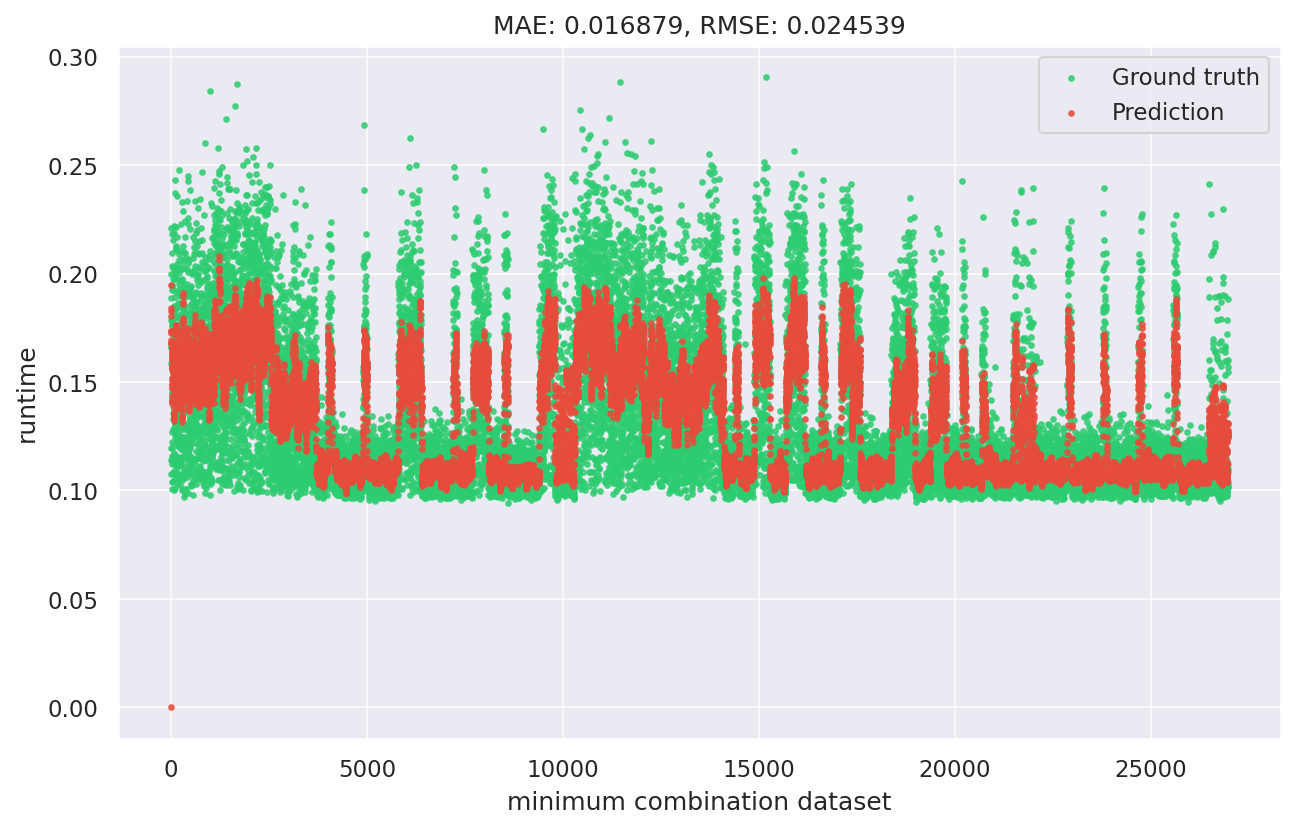

In [34]:
y_trues = []
y_preds_tuned = []
mae = []
rmse = []
model = neighbors.KNNRegressor(n_neighbors=35, engine = neighbors.LazySearch(window_size = 13), aggregation_method = 'mean')
metric1 = metrics.MAE()
metric2 = metrics.RMSE()
for x, y in stream.iter_pandas(X, Y):

    # Obtain the prior prediction and update the model in one go
    y_pred = model.predict_one(x)
    model.learn_one(x,y)
    
    if y == np.inf:
        y = 20
    else:
        y = y * 10 * 1
        
    y_pred = y_pred * 10 * 1
    if y_pred > 20:
        y_pred = 20

    # Update the error metric
    metric1.update(y,y_pred)
    mae.append(metric1.get())
    metric2.update(y,y_pred)
    rmse.append(metric2.get())

    y_trues.append(y)
    y_preds_tuned.append(y_pred)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(alpha=0.75)
ax.scatter(Y.index, y_trues, lw=1, color='#2ecc71', alpha=0.8, s=5, label='Ground truth')
ax.scatter(Y.index, y_preds_tuned, lw=1, color='#e74c3c', alpha=0.8, s=5, label='Prediction')
ax.legend()
ax.set_ylabel('runtime')
ax.set_xlabel('minimum combination dataset')
ax.set_title(f'{metric1}, {metric2}')

Text(0.5, 1.0, 'Real-time Performance after tuning the hyperparameters')

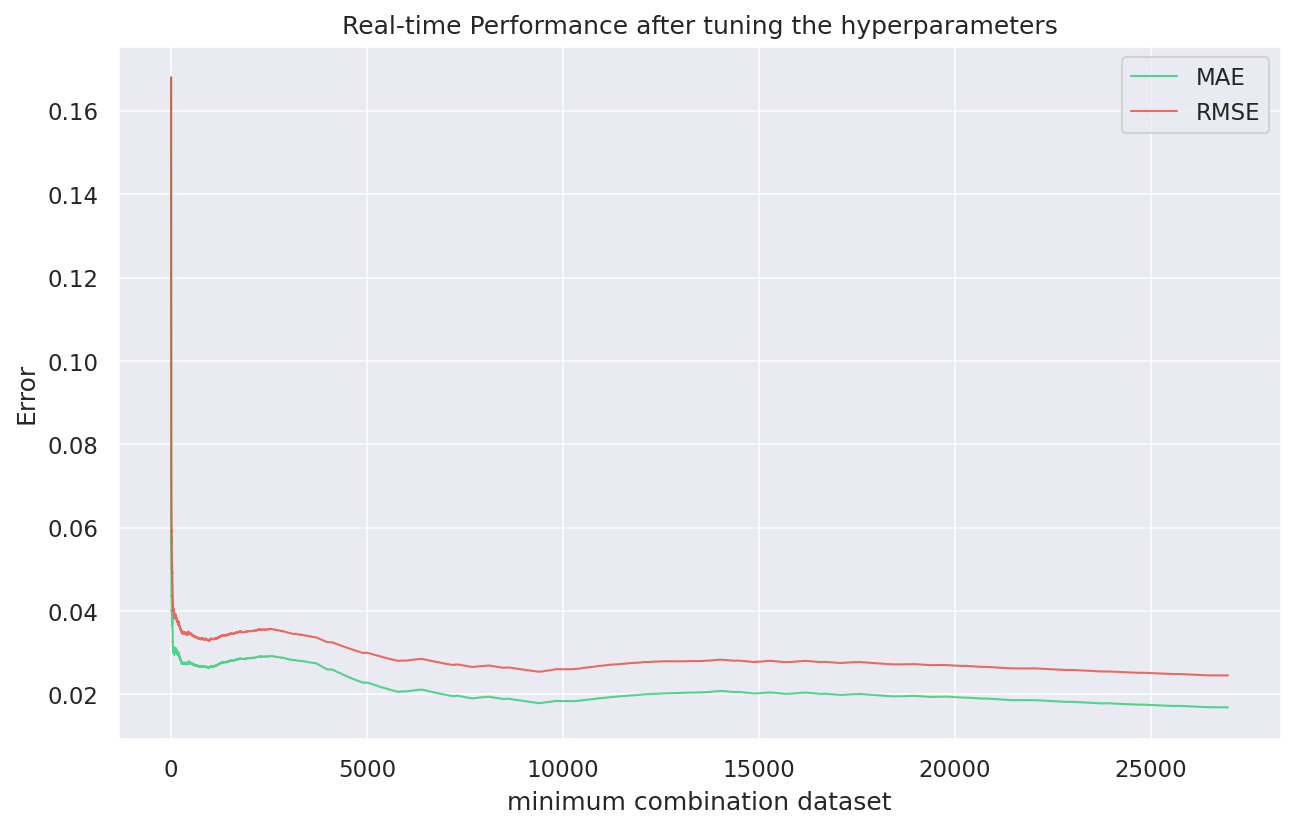

In [29]:
# Real-time performance of the K-NN model
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(alpha=0.75)
ax.plot(mae, lw=1, color='#2ecc71', alpha=0.8, label='MAE')
ax.plot(rmse,lw=1, color='#e74c3c', alpha=0.8, label='RMSE')
ax.legend()
ax.set_ylabel('Error')
ax.set_xlabel('minimum combination dataset')
ax.set_title(f'Real-time Performance after tuning the hyperparameters')

Text(0.5, 0, 'runtime')

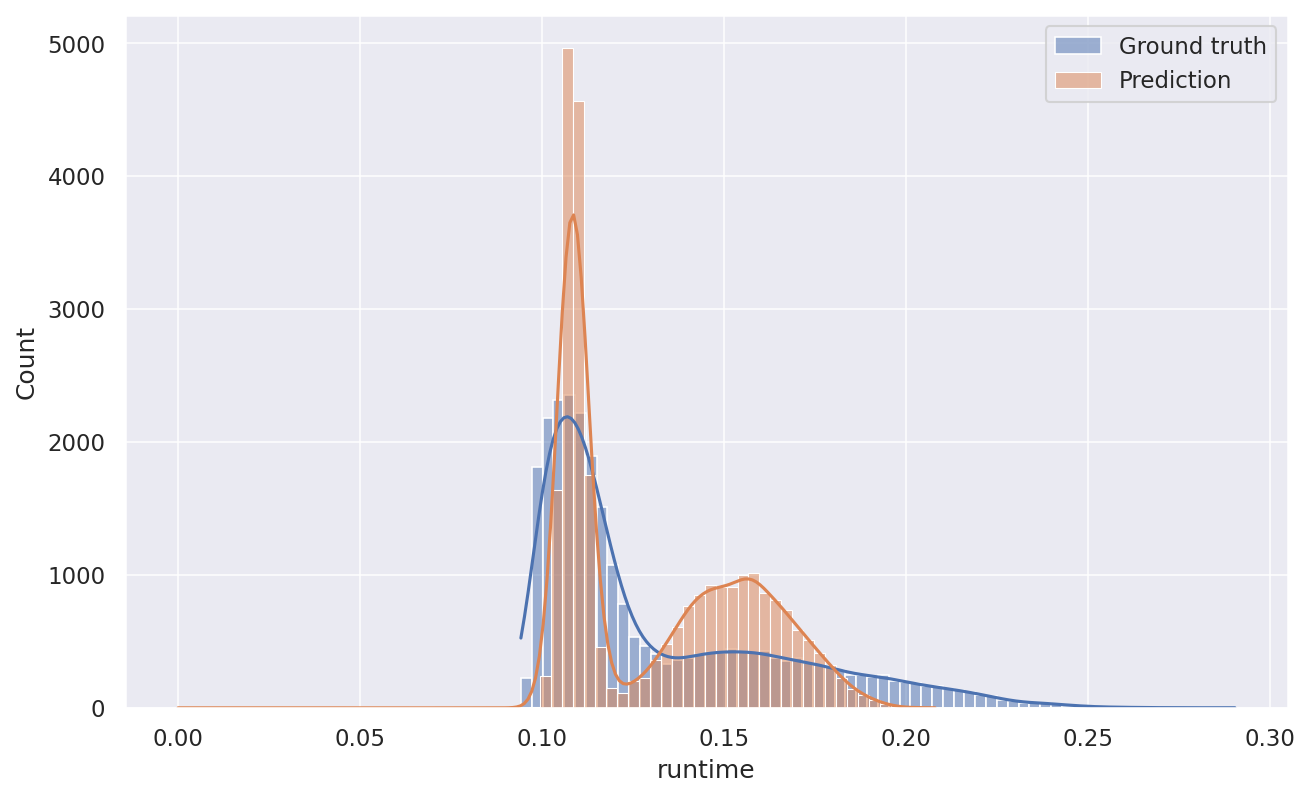

In [35]:
# The distributions of the predicted and actual running times
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(alpha=0.75)
sns.histplot(x=y_trues,kde=True,label='Ground truth')
sns.histplot(x=y_preds_tuned,kde=True,label='Prediction')
ax.legend()
ax.set_xlabel('runtime')

Text(0.5, 0, 'absolute error')

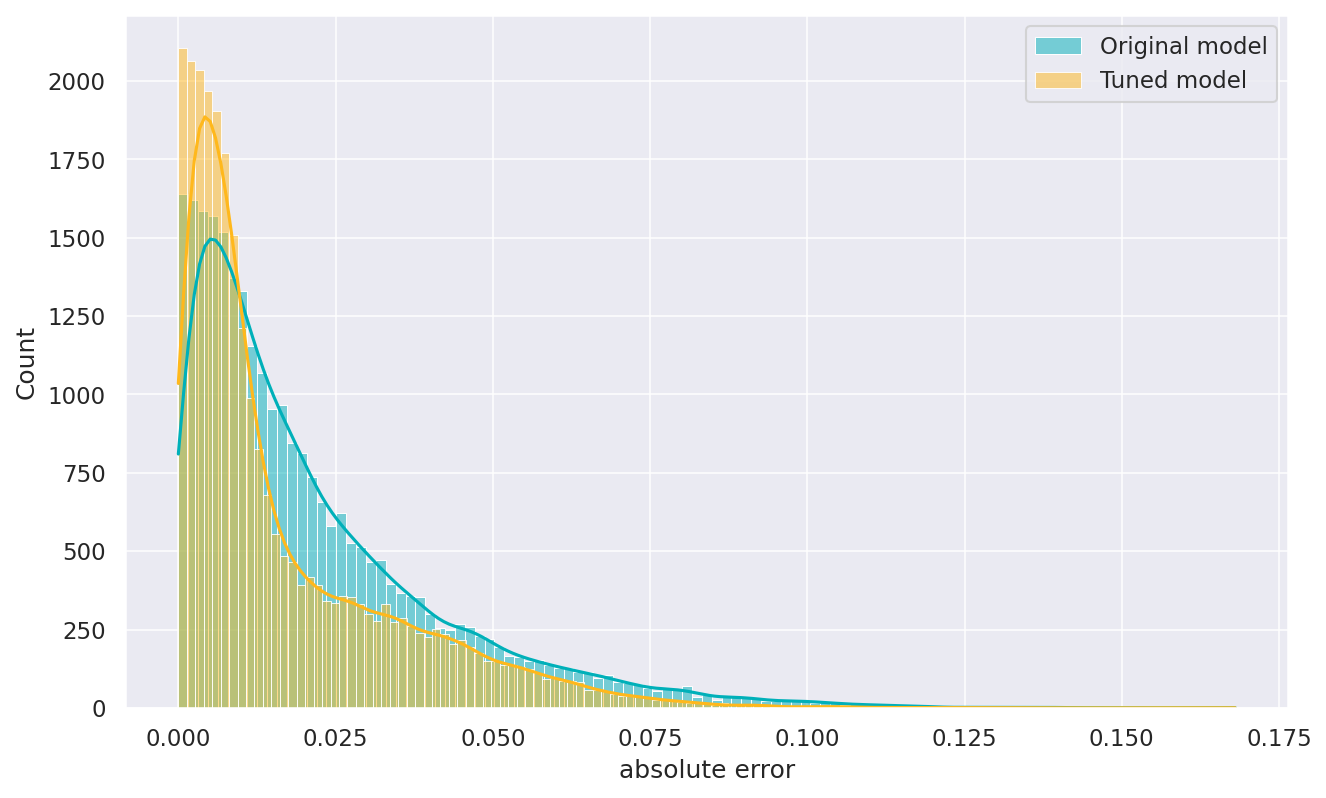

In [40]:
# Comparison of the absolute error distributions for the original online K-NN model and the tuned online K-NN model
abs_error = []
abs_error_tuned = []
for i in range(len(y_preds)):
    abs_error.append(abs(y_preds[i]-y_trues[i]))
    abs_error_tuned.append(abs(y_preds_tuned[i]-y_trues[i]))

fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(alpha=0.75)
sns.histplot(abs_error,kde=True,label='Original model',color = "#00b0b9")
sns.histplot(abs_error_tuned,kde=True,label='Tuned model',color = "#ffb81c")
ax.legend()
ax.set_xlabel('absolute error')

In [ ]:
# Evaluation of the model

In [24]:
model = neighbors.KNNRegressor(n_neighbors=35, engine = neighbors.LazySearch(window_size = 13), aggregation_method = 'mean')
y_total = []
i = 0
X_new = X
Y_new = Y

for x, y in stream.iter_pandas(X, Y):
    if y == np.inf:
        y = 99999
        
    y_spes = []

    # Obtain the prior prediction and update the model in one go
    y_pred = model.predict_one(x)
    model.learn_one(x,y)
            
    X_new = X_new.drop(index = i)
    Y_new = Y_new.drop(index = i)
    
    if not X_new.empty:
        for u,v in stream.iter_pandas(X_new, Y_new):
            y_spe = model.predict_one(u)
            if y_spe > 20:
                y_spe = 20
            y_spes.append(y_spe)
    else:
        y_spe = 0
        y_spes.append(y_spe)
        
    para_ml.loc[i, "remaining runtime based on the current model"] = sum(y_spes)*1*10
        
    i = i+1
    if i % 5 == 0:
        print(i)

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
805
810
815
820
825
830
835
840
845
850
855
860
865
870
875
880
885
890
895
900
905
910
915
920
925
930
935
940
945
950
955
960
965
970
975
980
985
990
995
1000
1005
1010
1015
1020
1025
1030
1035
1040
1045
1050
1055
1060
1065
1070
1075
1080
1085
1090
1095
1100
1105
1110
1115
1120
1125
1130
1135
1140
1145
1150
1155
1160
1165
1170
1175
1180
1185
1190
1195
1200
1205
1210
1215
1220

8420
8425
8430
8435
8440
8445
8450
8455
8460
8465
8470
8475
8480
8485
8490
8495
8500
8505
8510
8515
8520
8525
8530
8535
8540
8545
8550
8555
8560
8565
8570
8575
8580
8585
8590
8595
8600
8605
8610
8615
8620
8625
8630
8635
8640
8645
8650
8655
8660
8665
8670
8675
8680
8685
8690
8695
8700
8705
8710
8715
8720
8725
8730
8735
8740
8745
8750
8755
8760
8765
8770
8775
8780
8785
8790
8795
8800
8805
8810
8815
8820
8825
8830
8835
8840
8845
8850
8855
8860
8865
8870
8875
8880
8885
8890
8895
8900
8905
8910
8915
8920
8925
8930
8935
8940
8945
8950
8955
8960
8965
8970
8975
8980
8985
8990
8995
9000
9005
9010
9015
9020
9025
9030
9035
9040
9045
9050
9055
9060
9065
9070
9075
9080
9085
9090
9095
9100
9105
9110
9115
9120
9125
9130
9135
9140
9145
9150
9155
9160
9165
9170
9175
9180
9185
9190
9195
9200
9205
9210
9215
9220
9225
9230
9235
9240
9245
9250
9255
9260
9265
9270
9275
9280
9285
9290
9295
9300
9305
9310
9315
9320
9325
9330
9335
9340
9345
9350
9355
9360
9365
9370
9375
9380
9385
9390
9395
9400
9405
9410
9415


15515
15520
15525
15530
15535
15540
15545
15550
15555
15560
15565
15570
15575
15580
15585
15590
15595
15600
15605
15610
15615
15620
15625
15630
15635
15640
15645
15650
15655
15660
15665
15670
15675
15680
15685
15690
15695
15700
15705
15710
15715
15720
15725
15730
15735
15740
15745
15750
15755
15760
15765
15770
15775
15780
15785
15790
15795
15800
15805
15810
15815
15820
15825
15830
15835
15840
15845
15850
15855
15860
15865
15870
15875
15880
15885
15890
15895
15900
15905
15910
15915
15920
15925
15930
15935
15940
15945
15950
15955
15960
15965
15970
15975
15980
15985
15990
15995
16000
16005
16010
16015
16020
16025
16030
16035
16040
16045
16050
16055
16060
16065
16070
16075
16080
16085
16090
16095
16100
16105
16110
16115
16120
16125
16130
16135
16140
16145
16150
16155
16160
16165
16170
16175
16180
16185
16190
16195
16200
16205
16210
16215
16220
16225
16230
16235
16240
16245
16250
16255
16260
16265
16270
16275
16280
16285
16290
16295
16300
16305
16310
16315
16320
16325
16330
16335
16340
1634

22345
22350
22355
22360
22365
22370
22375
22380
22385
22390
22395
22400
22405
22410
22415
22420
22425
22430
22435
22440
22445
22450
22455
22460
22465
22470
22475
22480
22485
22490
22495
22500
22505
22510
22515
22520
22525
22530
22535
22540
22545
22550
22555
22560
22565
22570
22575
22580
22585
22590
22595
22600
22605
22610
22615
22620
22625
22630
22635
22640
22645
22650
22655
22660
22665
22670
22675
22680
22685
22690
22695
22700
22705
22710
22715
22720
22725
22730
22735
22740
22745
22750
22755
22760
22765
22770
22775
22780
22785
22790
22795
22800
22805
22810
22815
22820
22825
22830
22835
22840
22845
22850
22855
22860
22865
22870
22875
22880
22885
22890
22895
22900
22905
22910
22915
22920
22925
22930
22935
22940
22945
22950
22955
22960
22965
22970
22975
22980
22985
22990
22995
23000
23005
23010
23015
23020
23025
23030
23035
23040
23045
23050
23055
23060
23065
23070
23075
23080
23085
23090
23095
23100
23105
23110
23115
23120
23125
23130
23135
23140
23145
23150
23155
23160
23165
23170
2317

In [25]:
para_ml

,r_birth,f_birth,f_death,runtime_normalized,r_birth_normalized,f_birth_normalized,f_death_normalized,remaining runtime based on the current model
0,5.0,0.005,5.0,0.016803,0.0,0.0,0.0,4530.004963
1,5.0,0.005,5.789474,0.022095,0.0,0.0,0.00831,5243.082727
2,5.0,0.005,6.578947,0.015868,0.0,0.0,0.01662,4921.125494
3,5.0,0.005,6.666667,0.01887,0.0,0.0,0.017544,4962.324106
4,5.0,0.005,7.368421,0.01662,0.0,0.0,0.024931,4865.712504
...,...,...,...,...,...,...,...,...
26955,100.0,0.1,88.157895,0.011226,1.0,1.0,0.875346,0.507037
26956,100.0,0.1,91.666667,0.015999,1.0,1.0,0.912281,0.392821
26957,100.0,0.1,92.105263,0.010989,1.0,1.0,0.916898,0.252308
26958,100.0,0.1,96.052632,0.010845,1.0,1.0,0.958449,0.125786


In [26]:
for i in range(para_ml.shape[0]):
    para_ml.loc[i,"real reamining runtime"] = para_ml["runtime_normalized"][i+1:].sum()*1*10

In [27]:
para_ml

,Unnamed: 0,r_birth,f_birth,f_death,runtime_normalized,r_birth_normalized,f_birth_normalized,f_death_normalized,remaining runtime based on the current model,real reamining runtime
0,0,5.0,0.005,5.000000,0.016803,0.0,0.0,0.000000,4530.004963,3535.708373
1,1,5.0,0.005,5.789474,0.022095,0.0,0.0,0.008310,5243.082727,3535.487424
2,2,5.0,0.005,6.578947,0.015868,0.0,0.0,0.016620,4921.125494,3535.328742
3,3,5.0,0.005,6.666667,0.018870,0.0,0.0,0.017544,4962.324106,3535.140047
4,4,5.0,0.005,7.368421,0.016620,0.0,0.0,0.024931,4865.712504,3534.973844
...,...,...,...,...,...,...,...,...,...,...
26955,26955,100.0,0.100,88.157895,0.011226,1.0,1.0,0.875346,0.507037,0.533044
26956,26956,100.0,0.100,91.666667,0.015999,1.0,1.0,0.912281,0.392821,0.373059
26957,26957,100.0,0.100,92.105263,0.010989,1.0,1.0,0.916898,0.252308,0.263173
26958,26958,100.0,0.100,96.052632,0.010845,1.0,1.0,0.958449,0.125786,0.154725


Text(0.5, 1.0, 'remaining running time')

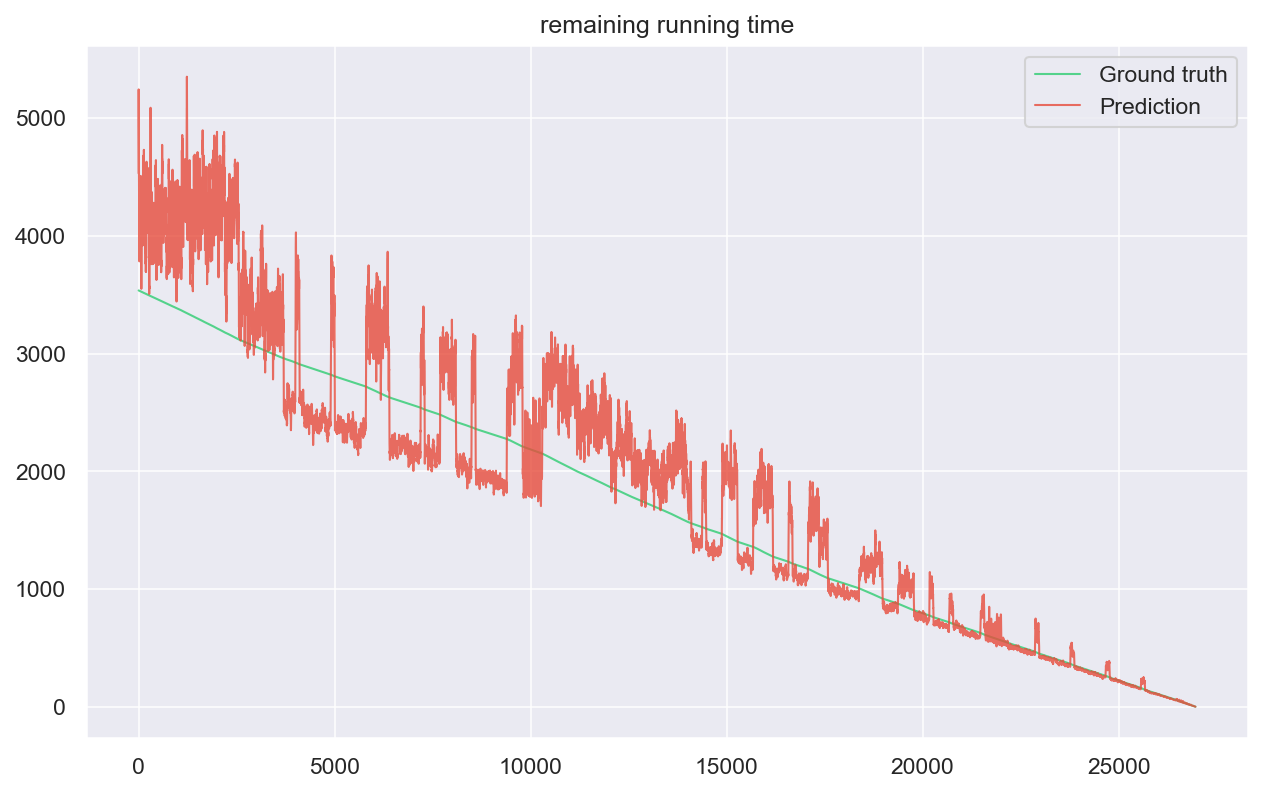

In [28]:
# The actual and predicted remaining running times
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(alpha=0.75)
ax.plot(para_ml.index, para_ml["real reamining runtime"], lw=1, color='#2ecc71', alpha=0.8, label='Ground truth')
ax.plot(para_ml.index, para_ml["remaining runtime based on the current model"], lw=1, color='#e74c3c', alpha=0.8, label='Prediction')
ax.legend()
ax.set_title(f'remaining running time')

In [30]:
# The worst-case scenario for the prediction model
worst = []
for i in range(para_ml.shape[0]-1,-1,-1):
    worst.append(i*20)

Text(0.5, 1.0, 'remaining running time')

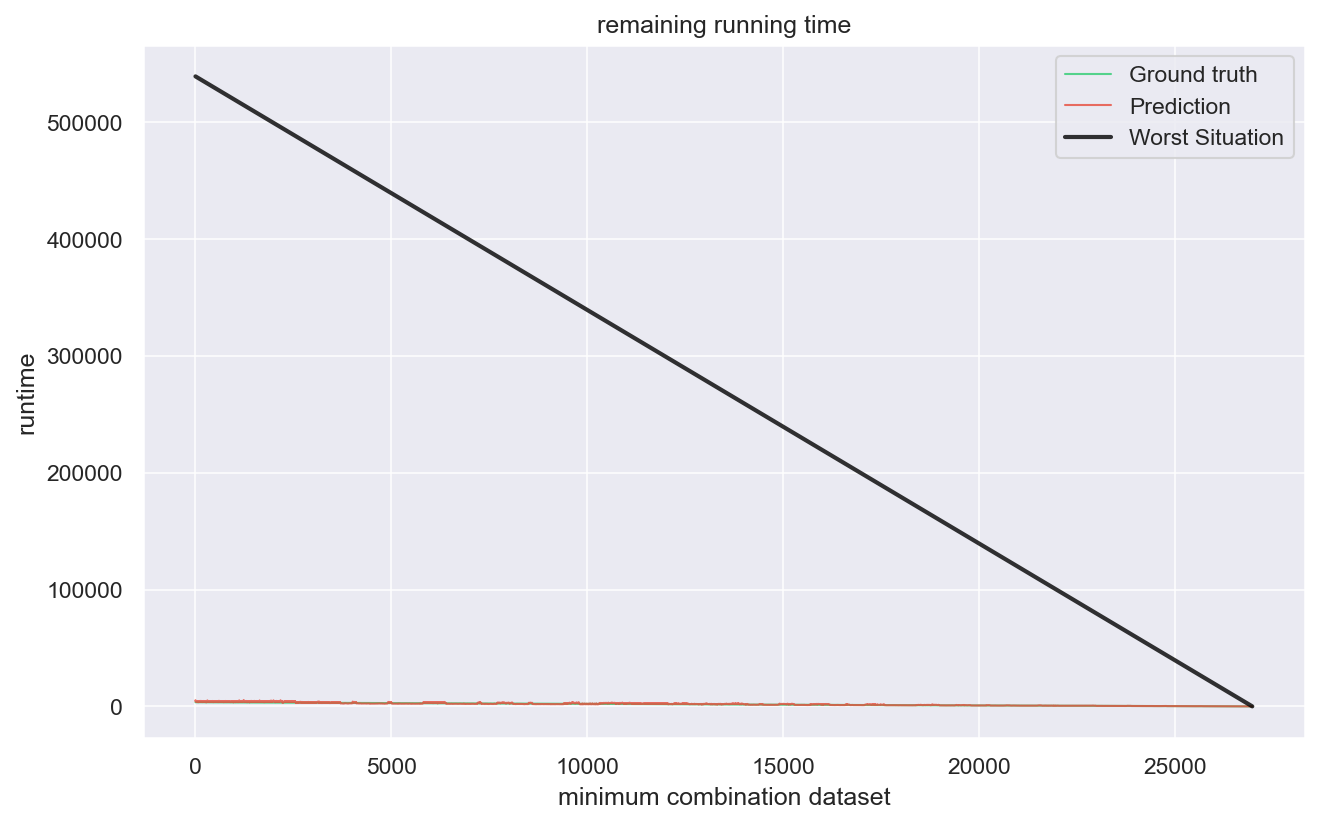

In [31]:
# Comparison of the worst-case scenario with the actual and predicted remaining running times
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(alpha=0.75)
ax.plot(para_ml.index, para_ml["real reamining runtime"], lw=1, color='#2ecc71', alpha=0.8, label='Ground truth')
ax.plot(para_ml.index, para_ml["remaining runtime based on the current model"], lw=1, color='#e74c3c', alpha=0.8, label='Prediction')
ax.plot(para_ml.index, worst, lw=2, color='black',alpha=0.8,label = 'Worst Situation')
ax.legend()
ax.set_ylabel('runtime')
ax.set_xlabel('minimum combination dataset')
ax.set_title(f'remaining running time')